In [11]:
import numpy as np
import sys
import os

%matplotlib inline

import matplotlib.pyplot as plt


import modules.ABC
import modules.hard2dfunction

from matplotlib import animation, rc
from IPython.display import HTML

In [12]:
FC = modules.hard2dfunction.Hard2dFunction()
l = np.linspace(-5000, 5000, 300)
xx, yy, zz = FC.get_lattice(l, l)

In [16]:
#fig = plt.figure(figsize=(8, 8))
#ax = fig.add_subplot(111)
#ax.grid()

#ax.contourf(xx, yy, zz, 20, alpha=0.8, cmap='hot')
#ax.contour(xx, yy, zz, 20, linewidths=1,)

BC = modules.ABC.BeeColony(FC, np.array([-4000, -4000]), np.array([4000, 4000]), 
                           n_bees=10, n_iter=300,
                           weight_generator=lambda n: 1.0 * np.exp(-n / 2000),
                           local_attraction_generator=lambda n: 0.8 * np.exp(-n/200) ,
                           global_attraction_generator=lambda n: 0.4 * (1 - np.exp(-n / 100)),
                           sigma_generator=lambda n: 20 * np.exp(-n / 200))
traj, glb = BC.run_trajectories()
print(traj.shape)
print(len(BC.bee_array))

traj:-1922.7939: 100%|██████████| 300/300 [00:01<00:00, 220.00it/s]


(300, 10, 2, 2)
10


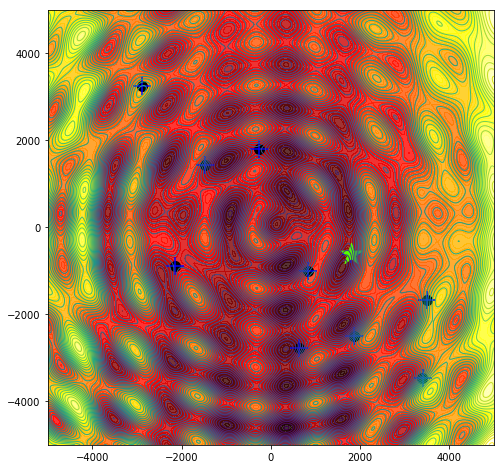

In [17]:
from matplotlib.animation import FuncAnimation

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.grid()


def update(frame):
    ax.clear()
    cf = ax.contourf(xx, yy, zz, 100, alpha=0.8, cmap='hot')
    co = ax.contour(xx, yy, zz, 40, linewidths=1,)
    
    #tt = ax.quiver(traj[frame, :, 0, 0], traj[frame, :, 0, 1], 
    #               traj[frame + 1, :, 0, 0] - traj[frame, :, 0, 0], 
    #               traj[frame + 1, :, 0, 1] - traj[frame, :, 0, 1],)
    bees = ax.scatter(traj[frame, :, 0, 0], traj[frame, :, 0, 1], color='black', s=100)
    local = ax.scatter(traj[frame, :, 1, 0], traj[frame, :, 1, 1], color='blue', marker='+', s=300)
    gl = ax.scatter([glb[frame, 0]], [glb[frame, 1]], marker='*', color='#55ff00', s=500)
    
    return cf, co, bees, local, gl
    
ani = FuncAnimation(fig, update, frames=len(traj), interval=100)

In [ ]:
HTML(ani.to_html5_video())